<a href="https://colab.research.google.com/github/darshandahal/MachineLearning/blob/main/Logestic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#to download data
import gdown
dataset_url = "https://drive.google.com/u/1/uc?id=1X7-HGxDHR54J60vdrwekaML-blIHQjBi&export=download"
filename = "train.csv"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/u/1/uc?id=1X7-HGxDHR54J60vdrwekaML-blIHQjBi&export=download
To: /content/train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 32.9MB/s]


'train.csv'

In [ ]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# predecting survived data  . it is binary classification so we we classification algorithm

In [ ]:
df.shape

(891, 12)

# Detecting missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Lets check the missing data

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

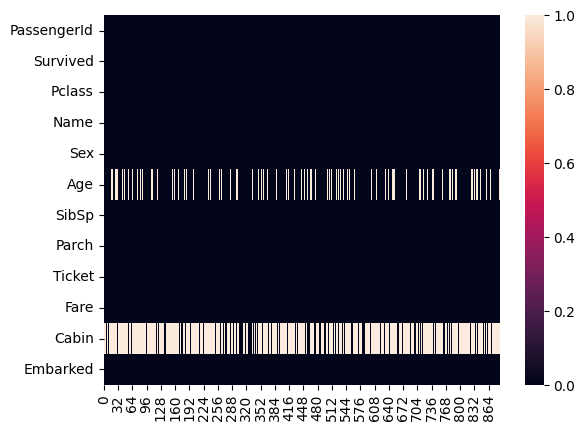

In [ ]:
import seaborn as sns
sns.heatmap(df.isna().transpose())

In [ ]:
# missing data in percentage in each column
df.isna().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* Age column has 19% missing data.
* Cabin column has 77% missing data.
* Embarked column has 0.22% missing data.

# EDA

In [ ]:
# list all columns name in dataframe
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Dataset contains 549 examples\rows who didnt survived and 342 rows who survived

<Axes: xlabel='Survived', ylabel='count'>

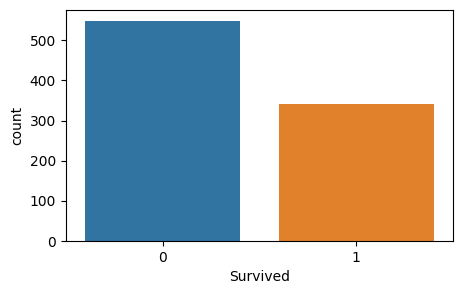

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
sns.countplot(x='Survived', data = df)

In [ ]:
df['Survived'].value_counts() / len(df) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

0 class has 61% data and 1 class has 38% data.
clearly the given data is imbalanced
- Accruacy is not a good metric to evaulate model fitted with imbalanced data .
To make data balanced we have several technique
* Oversampling of a class having low percentage \ count
* undersampling of a class having high percentage\ count

This technique can be done using SMOTE

# is there any relationship between sex and survived

<Axes: xlabel='Survived', ylabel='count'>

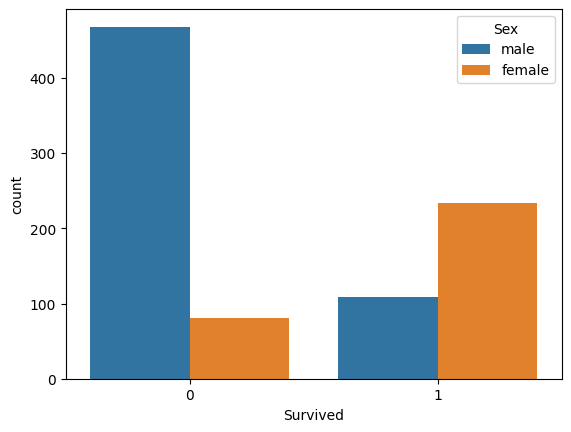

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)

most of the mean died and most of the women survived. there is relationship between them . therefor sex could be good predictor variable on the data

# is there any relationship between survived and pclass

<Axes: xlabel='Survived', ylabel='count'>

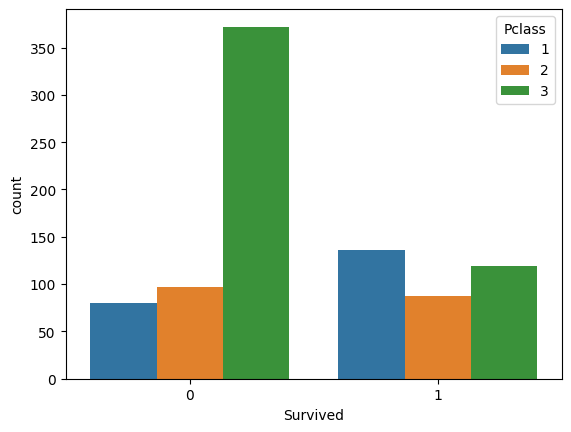

In [ ]:
sns.countplot(x = 'Survived', hue='Pclass', data = df)

most of the people in 3rd class died and most of the people in 1 class survived so suspect there is some relationship

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# is threr any reltionship between pclass and age

In [ ]:
df.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
df.groupby('Pclass').Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

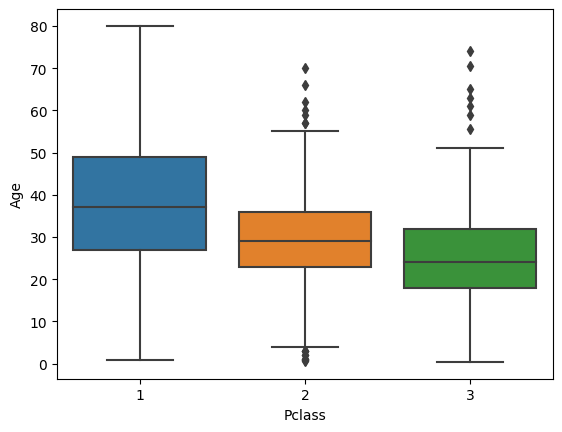

In [ ]:
sns.boxplot(data = df , x = 'Pclass', y= 'Age')

Pclass has a direct relation with Age .Seems like if you are of more age you are likely to be in pclass 1..

note- we have missing data on age column. the smart way to handle in missing data is to use pclass

# Distribution of Age and fair

<Axes: xlabel='Fare', ylabel='Count'>

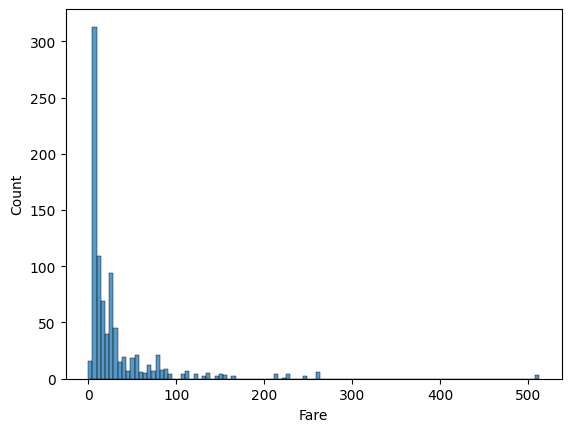

In [ ]:
sns.histplot(df.Fare)

# missing data handling in Age column

In [ ]:
df.groupby('Pclass').Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
def fill_missing(col):
  age= col[0]
  pclass = col[1]
  if pd.isna(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    else:
      return 24
  return age


In [ ]:
df['Age'] = df[['Age', 'Pclass']].apply(fill_missing, axis = 1)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

cabin has more than 70 percrntage missing data so we drop it

In [ ]:
df.drop(columns = ['Cabin'], inplace = True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Embarked has only two rows missing so we drop row

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


the columns pasenger id , name, and ticket didnt give any signal or value to target survived so they are irrrevalent feature . we have to drop these columns

In [ ]:
df.drop(columns= ['PassengerId', 'Name', 'Ticket'], inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
clean_data = pd.get_dummies(columns=['Sex', 'Embarked'],data = df, drop_first = True)

In [ ]:
clean_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
X = clean_data.iloc[:, 1:] # independent variable
y = clean_data.Survived    # dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 40)

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= 5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             classification_report,
                             confusion_matrix)

In [ ]:
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f"Accuracy: {accuracy}")

f1_score = f1_score(y_true = y_test, y_pred = y_pred)
print(f"f1_score: {f1_score}")

precision = precision_score(y_true = y_test, y_pred = y_pred)
print(f"precision_score: {precision}")

recall = recall_score(y_true = y_test, y_pred = y_pred)
print(f"recall_score: {recall}")

Accuracy: 0.8033707865168539
f1_score: 0.7445255474452556
precision_score: 0.7391304347826086
recall_score: 0.75


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
confusion_matrix(y_test, y_pred)

array([[92, 18],
       [17, 51]])

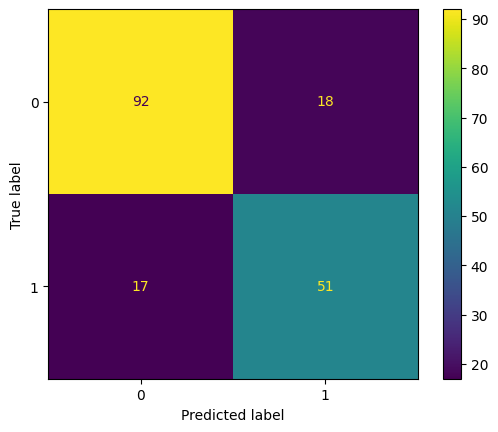

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()